# <span style="color:green"> Predicting Heart Disease</span>
**Name:**  Leah Nicholson <br/>
**Course:**  Machine Learning AI240<br/>
**Date:**  05/10/2025 <br/>
**Description:**  Creation of a Logistic Regression model for classification, used to predict yes/no to heart disease. <br/>
We load a dataset with medical attributes of patients (age, blood pressure, etc.) and info about whether they have heart disease. <br/>
We explore it visually to understand patterns, clean and scale the data, <br/>
train a Logistic Regression model to predict disease presence, <br/>
and then evaluate how well it does using tools like confusion matrix, precision, recall, and accuracy.<br/>

# <span style="color:green"> Data Exploration</span>

## Import libraries and create dataframe

In [4]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# Create DataFrame
heart_df = pd.read_csv('heart.csv')


## Inspect columns, shape

In [6]:
heart_df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [7]:
heart_df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [8]:
heart_df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1
1024,54,1,0,120,188,0,1,113,0,1.4,1,1,3,0


In [9]:
# There are 1025 rows (instances aka patients), and 14 columns
heart_df.shape


(1025, 14)

In [10]:
heart_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [11]:
heart_df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


**VISUALIZE THE DATA:** <br/>


**Distribution of Target Variable:** <br/>
It is good to have an even distribution between the yes/no cases<br/>
Otherwise, if the classes are highly imbalanced (e.g., 90% healthy, 10% sick), the model might just predict the majority class<br/>
From the graph, we see that they are roughly equal in distribution between healthy/sick<br/>

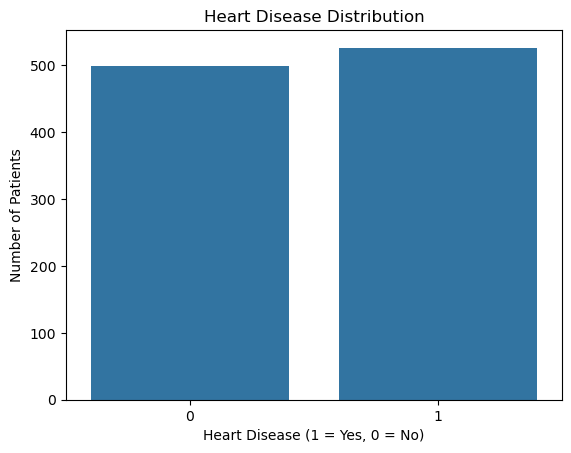

In [14]:
# Visualize the distribution of the target variable
sns.countplot(x='target', data = heart_df)
plt.title('Heart Disease Distribution')
plt.xlabel('Heart Disease (1 = Yes, 0 = No)')
plt.ylabel('Number of Patients')
plt.show()


**Correlation Heatmaps** <br/>
Measures the strength of linear relationships between features and the target.<br/>
Values range from: +1 (strong positive correlation), 0 (no correlation), -1 (strong negative correlation)<br/>

Helps identify:<br/>
Strong predictors of heart disease (e.g., cp, thalach, oldpeak)<br/>
Features that are too similar (e.g., trestbps and chol)<br/>
We might consider dropping or combining highly correlated features to reduce redundancy, but instructions indicate to keep all the columns<br/>

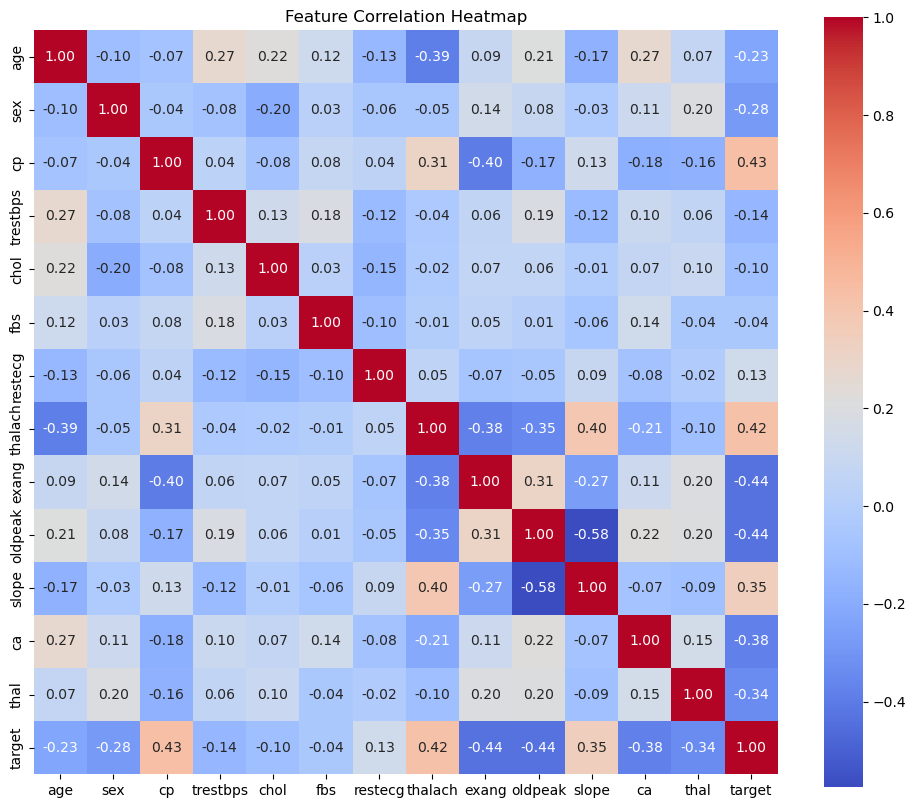

In [16]:
# Correlation heatmap
plt.figure(figsize=(12, 10))
corr = heart_df.corr()
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Feature Correlation Heatmap')
plt.show()


**Distribution of CP (chest pain type)** <br/>
The distribution of a specific feature (cp: chest pain type) broken down by whether or not the patient has heart disease<br/>
Reveals feature importance in visual form - e.g., if one chest pain type strongly correlates with the presence of heart disease<br/>
Can influence feature engineering or interpretability of the model<br/>

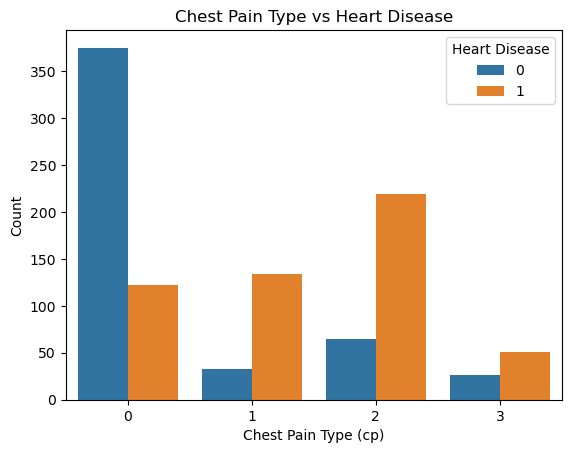

In [18]:
# Chest pain type vs target
sns.countplot(x='cp', hue='target', data=heart_df)
plt.title('Chest Pain Type vs Heart Disease')
plt.xlabel('Chest Pain Type (cp)')
plt.ylabel('Count')
plt.legend(title='Heart Disease')
plt.show()


# <span style="color:green"> Data Preprocessing</span>

## Inspect for null values
**PROCESSING:** <br/>
Dataset appears to have no null values - no action required


In [21]:
heart_df.info()
heart_df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

# <span style="color:green"> Modeling Logistic Regression </span>

**SELECTING FEATURES** <br/>
First, we split the dataset to define the features and target variable

In [24]:
feature_cols = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal']
                
X = heart_df[feature_cols]     # X is the features (the columns)
y = heart_df.target             # y is the target variable (have disease or not, defined by column named 'target')

**NORMALIZING** <br/>
'l2' normalization (default): <br/>
Each sample in X is scaled so that the sum of squared values equals 1<br/>
In math: this means dividing each element by the Euclidean norm (i.e., square root of sum of squared values)<br/>
Useful when emphasizing relative proportions rather than absolute values<br/>
This had the added benefit of solving a recurring error regarding max limits reached<br/>

In [26]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X = X_scaled                            # I wanted to preserve the same naming

**SPLITTING DATA**<br/>
Divide the dataset into a training set and a test set using the function train_test_split()  <br/>
Pass 3 parameters: features, target, and test_set size <br/>
Additionally, use random_state to select records randomly <br/>

In [28]:
# split X and y into training and testing sets (80/20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 16)

**MODEL DEVELOPMENT AND PREDICTION**  <br/>
Created a logistic regression classifier object using the LogisticRegression() function with random_state for reproducibility. <br/>
Fitted the model on the training set using fit()  <br/>
Performed prediction on the test set using predict() <br/>

In [30]:
# instantiate the model (using the default parameters)
model = LogisticRegression(random_state = 16)

# fit the model with data
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# <span style="color:green"> Evaulation of Model </span>

**EVAULATION METHODS:** <br/>
A confusion matrix is a table that is used to evaluate the performance of a classification model <br/>
We can also visualize the performance of an algorithm <br/>
We will look at the number of correct and incorrect predictions summed up by class <br/>

**HOW TO READ:** <br/>
This produced a confusion matrix in the form of the array object<br/>
The dimension of this matrix is 2*2 because this model is binary classification<br/>
There are two classes: 0 and 1<br/>
Diagonal values represent accurate predictions, while non-diagonal elements are inaccurate predictions<br/>

Top left/bottom right are actual predictions, and top right/bottom left are incorrect predictions<br/>

In [34]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[82, 22],
       [10, 91]], dtype=int64)

**HEATMAP OF CONFUSION MATRIX**

Text(0.5, 427.9555555555555, 'Predicted label')

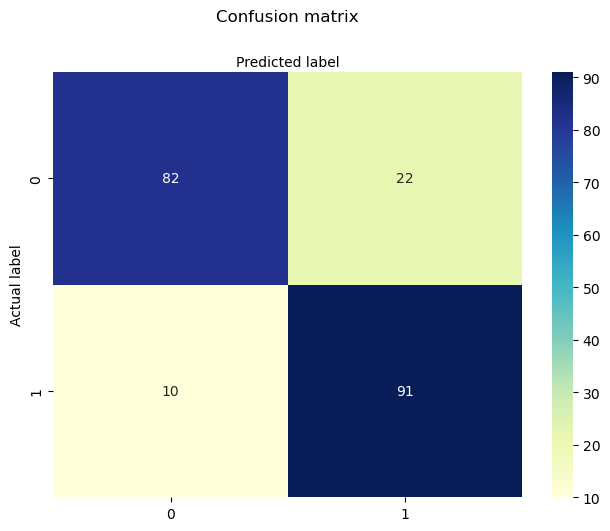

In [36]:
class_names = [0,1]                        # name  of classes

fig, ax = plt.subplots()

tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")

# Labels
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')


**CLASSIFICATION REPORT:  Confusion Metrics** <br/>

Precision: When your model predicts "disease", how often is it correct<br/>
Recall: Of all actual heart disease cases, how many did your model find<br/>
F1 Score: Harmonic mean of precision and recall (best if classes are imbalanced)<br/>

In [38]:
target_names = ['without heart disease', 'with heart disease']
print(classification_report(y_test, y_pred, target_names = target_names))

                       precision    recall  f1-score   support

without heart disease       0.89      0.79      0.84       104
   with heart disease       0.81      0.90      0.85       101

             accuracy                           0.84       205
            macro avg       0.85      0.84      0.84       205
         weighted avg       0.85      0.84      0.84       205



**ROC CURVE**<br/>
ROC Curve visualizes the trade-off between sensitivity and specificity.<br/>
AUC quantifies the curve — 0.5 means no better than chance, 1.0 is perfect.<br/>

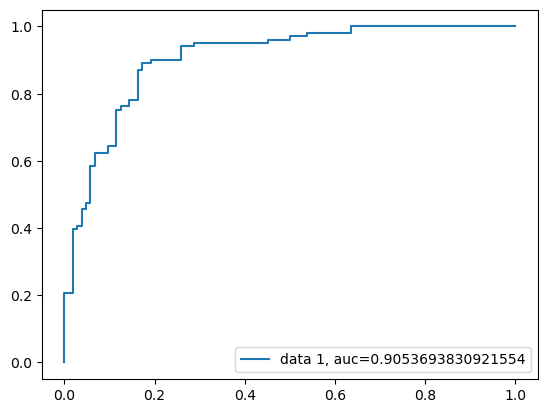

In [40]:
y_pred_proba = model.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

**COEFFICIENTS** <br/>
Tells which features contribute most to the model

In [42]:
model.fit(X_train, y_train)
coefficients = pd.DataFrame({
    'Feature': feature_cols,
    'Coefficient': model.coef_[0]
}).sort_values(by='Coefficient', ascending=False)

print(coefficients)

     Feature  Coefficient
2         cp     0.885442
7    thalach     0.465560
10     slope     0.385634
6    restecg     0.203102
5        fbs     0.020918
0        age    -0.094971
4       chol    -0.234194
3   trestbps    -0.352223
8      exang    -0.402429
12      thal    -0.572236
9    oldpeak    -0.715960
1        sex    -0.786546
11        ca    -0.828306


**ACCURACY SCORE** <br/>
In conclusion, the accuracy of this model:<br/>
(Shows the percentage of correct predictions if model is balanced)<br/>

In [44]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.84
